In [12]:
# We are creating a dataset which is based on all of the dual-task trials per block and we are ignoring the practice trials
# The dataset is built by merging the results acquired in the paper created by Chris (---link---)

# Some columns are based on the significance provided in the said paper ( & maybe image here)
# The csv files we are merging into our dataset are provided below

# -MaxDeviationPerTrial.csv
# -maxnrDigitEnteredPerPPAndPerBlockPerTrial.csv
# -numberOfVisitsTrackerPerParticipantPerBlock.csv (trial data)
# samplesOutsideTrial.csv(*)
# sdVisTime.csv(*)
# tableForMeanTimeInDigitPerPPandPerBlock.csv(*) - merge the data ber block maybe?

# We are using the payoff function values provided in the meanVisTime.csv file
# The columns marked with star could be significant and we are testing to see the results with or without the said feature

In [26]:
# We first read the data and display it
final_rows = []

import pandas as pd
data = pd.read_csv('./data.csv');

,Unnamed: 0,SubjectNr,TrialNumber,Block,PayOffFunctionNumeric,Radius,Noise,IKINumber,MaxDeviation,MaxNrDigits,TrackingWindowVisitCounter,MeanTimeTypingWindow,Score
0,1,101,107,1,1,80,3,0.308554,76.66,6,3,2.079050,0.028
1,2,101,108,1,1,80,3,0.308554,44.27,9,2,2.111167,0.070
2,3,101,109,1,1,80,3,0.308554,69.16,8,2,2.060633,0.062
3,4,101,110,1,1,80,3,0.308554,71.33,11,1,3.286850,0.073
4,5,101,111,1,1,80,3,0.308554,37.37,7,3,2.154425,0.013


In [96]:
# We first split the data into 8 datasets
# and we calculate the mean value for each of the dataset
# in order to see how biased the data is in terms of 
# Radius, Noise and the payoff function

split_on = ['PayOffFunctionNumeric','Radius','Noise']

def split(dataSets,col):
    
    s = []
    
    for data in dataSets:
        
        if(col >= len(split_on)):
            return None
        
        values = {}
        
        for row in range(0,data.shape[ 0 ]):
            splitColumn = split_on[ col ]

            rowValue = data.iloc[ row ][ splitColumn ]
            
            if not rowValue in values:
                values[ rowValue ] = [ ]
                
            values[ rowValue ].append(row)
            
        for value in values:
            
            nextSet = []
            
            for row in values[value]:
                nextSet.append(data.iloc[ row ])
                
            s.append(pd.DataFrame(nextSet))
            
        
    res = split( s , col + 1 )
    
    if res is None:
        return s
    else: 
        return res
    
sets = [data]

split_sets = split(sets,0)

print('Resulting length : ' +  str(len(result)))

Resulting length : 8


In [143]:
#We then take the top N percent of each of the sets

def get_by_split(sets,start, step, end, func):
    while start <= end:
        for dataSet in sets:
            sorted_set = dataSet.sort_values('Score')
            total = dataSet.shape[0] * start
            items = sorted_set.head(int(total))
            func(start,items)
        start = start + step

per_tick = {}

#We then compute the mean for the score column for the provided dataset
def mean(current_tick,item):
    meanVal = item['Score'].mean()
    
    if current_tick not in per_tick:
        per_tick[current_tick]= []
        
    per_tick[current_tick].append(meanVal)

get_by_split(split_sets, 0.25, 0.05, 0.4,mean)

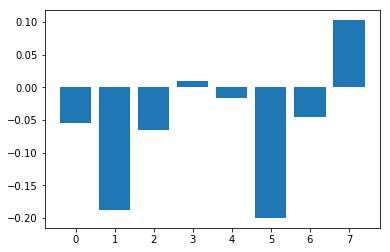

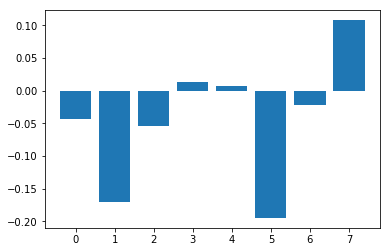

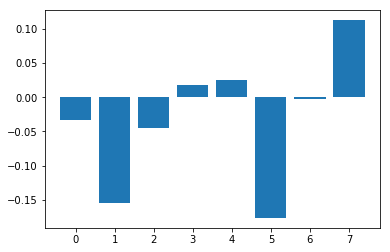

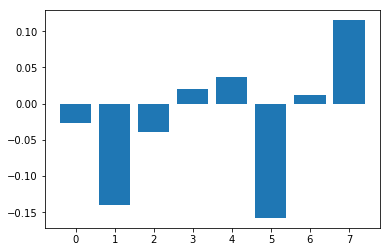

In [144]:
# We can now measure the distributions
# by testing different sizes

import matplotlib.pyplot as plt
import numpy as np

for tick_size in per_tick:
    tick_marks = np.arange(len(per_tick[tick_size]))
    fig, ax = plt.subplots()
    plt.bar(tick_marks,per_tick[tick_size])
    plt.show()


In [25]:
# Then we split the data into training and testing sets by using the train test split function
from sklearn.model_selection import train_test_split

# Percentage of 
test = 0.25

y = data.loc[data['Block']]
X = data.drop('Radius',1)


#We split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test)

   Unnamed: 0  SubjectNr  TrialNumber PayOffFunction  Radius  Noise  Block  \
1           2        101          108          Speed      80      3      1   

  IKIgroup  MaxDeviation  MaxNrDigits  TrackingWindowVisitCounter  \
1     fast         44.27            9                           2   

   MeanTimeTypingWindow  
1              2.111167  
   Unnamed: 0  SubjectNr  TrialNumber PayOffFunction  Noise  Block IKIgroup  \
0           1        101          107          Speed      3      1     fast   

   MaxDeviation  MaxNrDigits  TrackingWindowVisitCounter  MeanTimeTypingWindow  
0         76.66            6                           3               2.07905  


In [1]:
from sklearn.svm import SVR
from sklearn import tree


algorithms = [SVR, tree]

for algorithm in algorithms:
    instance = algorithm()